<a href="https://colab.research.google.com/github/hariskhan-hk/regression_regularization/blob/main/Regularization_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge, Lasso & Elastic Net

## Import Dependencies

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear, Ridge, and Lasso

In [3]:
# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 balances L1 and L2

# Fit models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)

# Compare coefficients
coef_df = pd.DataFrame({
    'Feature': [f'X{i}' for i in range(X.shape[1])],
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elastic.coef_
})
print(coef_df)

  Feature      Linear       Ridge       Lasso  ElasticNet
0      X0   37.904021   45.367377    0.000000   10.830921
1      X1 -241.964362  -76.666086 -152.664779   -0.009514
2      X2  542.428759  291.338832  552.697775   38.906865
3      X3  347.703844  198.995817  303.365158   28.779233
4      X4 -931.488846   -0.530310  -81.365007   10.372007
5      X5  518.062277  -28.577050   -0.000000    7.191892
6      X6  163.419983 -144.511905 -229.255776  -23.510979
7      X7  275.317902  119.260066    0.000000   25.627160
8      X8  736.198859  230.221608  447.919525   35.073745
9      X9   48.670657  112.149830   29.642617   24.071251


# Visualization

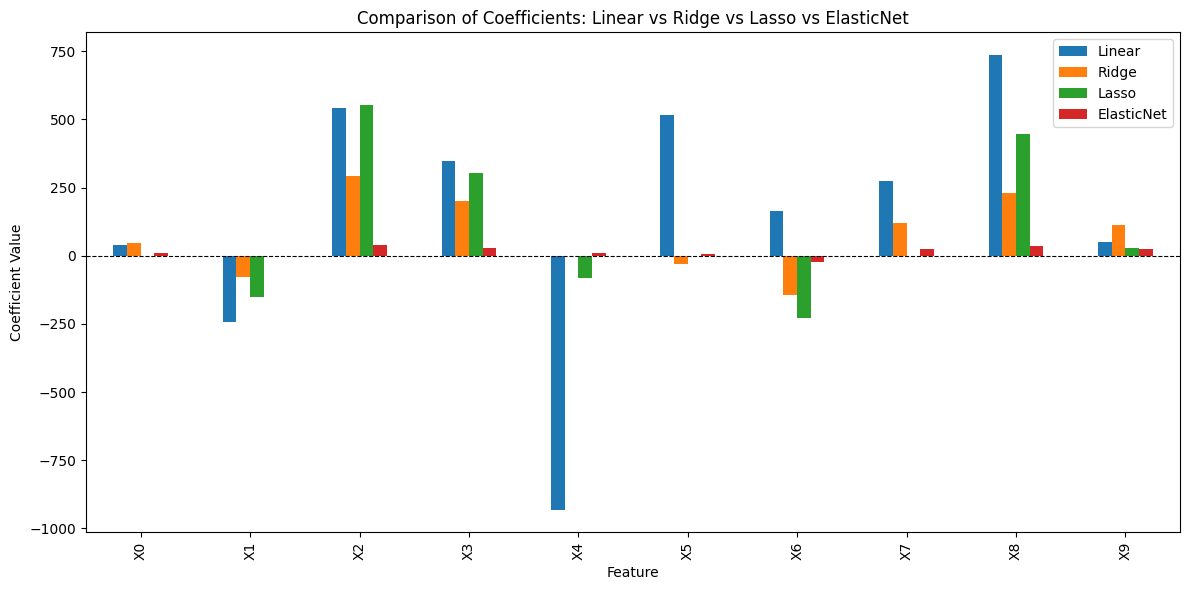

In [5]:
coef_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Coefficients: Linear vs Ridge vs Lasso vs ElasticNet")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()